# Big Data Mart Sales Problem

### Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.



In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dt = pd.read_csv('bigdatamart_Train.csv')
dt

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Glance at dataset

1. Homogenity of continous numeric and categorical variables
2. Target variable is contionous. Hence, Regression model applies.
3. Couple of categorical columns such as Item_type, Outlet_size, Location_type, Outlet_type, Item_Fat_content.
4. Presnce of non-contributional column like Item_identifier & Outlet_Identifier. Hence can be drooped
5. Standardization is required
6. Nan values visible
7. Abnormal distribution seems to exist

## Exploratory Data Analysis

In [3]:
#check the brief information regarding dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
#check null values in each feature
dt.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

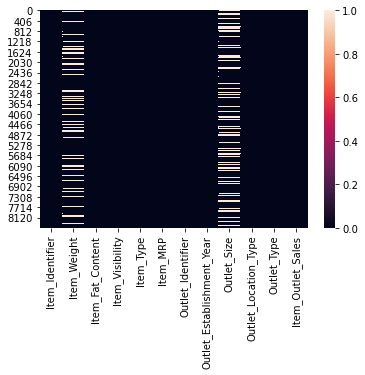

In [5]:
#checkout the null-values in heatmap
sns.heatmap(dt.isnull())

In [6]:
#Statistics of features
dt.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Observations

1. Item_weight as stated above has nearly 1500 values missing
2. Mean of every column is varying. Hence need to standardized data
3. Std of Item_MRP & Outlet_Sales are noticeably high
4. The difference in min & max for outlet_sales is absurd
5. The IQR (Q1 & Q3) for Item_MRP & Outlet_Sales are also observant
6. Not much of a length between mean & median(50%) 
7. Sales has a bear minimum of 33 while its max is 13086 which shows its proximity in the range
8. MRP has its min at 31.29 while its max is 266.88. 
9. For the establishment_year, oldest listed outlet is opened in 1985 and the latest one is 2009.


<AxesSubplot:>

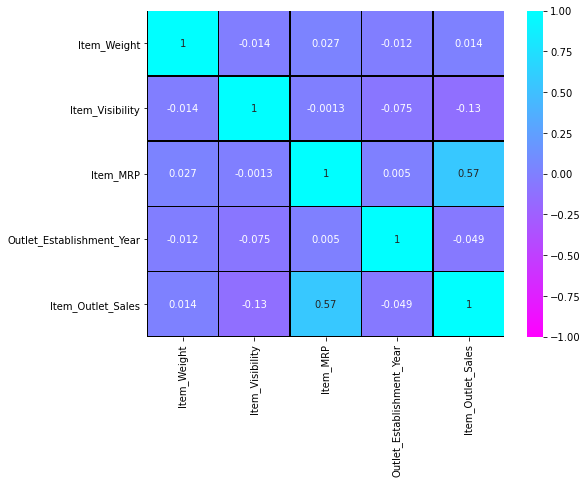

In [7]:
#heatmap of correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(dt.corr(),annot = True, linecolor='black',linewidths=0.4,cmap = 'cool_r',vmin=-1, vmax=1)

In [8]:
#since there is presence of categorical values, lets check unique values
dt.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
#Create a list of categorical columns
cat_cols = []
for x in dt.dtypes.index:
    if dt.dtypes[x] =='object':
        cat_cols.append(x)
        
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
#we dont need item_identifier & outlet_identifier
cat_cols.remove('Item_Identifier')
cat_cols.remove('Outlet_Identifier')
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
#displaying values for each category in attribite
for i in cat_cols:
    print(f'{i}:')
    print(dt[i].value_counts())
    print('\n')

Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Size:
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Outlet_Location_Type:
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Outlet_Type:
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dt

In [12]:
#At first, fill the missing values
#we will fill NaN of Item_Wight based off their Item_Type

mean_item_weight = dt.pivot_table(values = 'Item_Weight', index = 'Item_Type')
mean_item_weight

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


we can fill the null values in Item_Weight with their mean since there's not much deviation in the figure. But that can lower the prediction accuracy.

In [13]:
#mean of the Item_weight
dt['Item_Weight'].mean() 

12.857645184136183

In [14]:
#assigning null values of 'Item_Weight' to new instance
null_item_weight = dt['Item_Weight'].isnull()
null_item_weight

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [15]:
for i,item in enumerate(dt['Item_Type']):    #for row,column in 'Item_Type'
    if null_item_weight[i]:                     #if there's any null values 
        if item in mean_item_weight:         #check for column in mean_item_weight
            dt['Item_Weight'][i] = mean_item_weight.loc[item]['Item_Weight']  #for every row in Item_weight,fill its values with corresponding value in mean_item_weight
        else:              #if there's no value in mean_item_weight corresponding to item_weight
            dt['Item_Weight'][i] = np.mean(dt['Item_Weight']) #fill it with mean of Item_Weight

<ipython-input-15-0b0047dbe174>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Item_Weight'][i] = np.mean(dt['Item_Weight']) #fill it with mean of Item_Weight


In [16]:
dt['Item_Weight'].isnull().sum()

0

In [17]:
#since the NaN of Outlet_Size is greater, will replace with it mode of Outlet_Type
dt['Outlet_Type'].mode()

0    Supermarket Type1
dtype: object

In [18]:
dt['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [19]:
#displaying the mode of outlet_size corresponding to its outlet_type
mode_outlet_size = dt.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [20]:
null_outlet_size = dt['Outlet_Size'].isnull()
dt.loc[null_outlet_size, 'Outlet_Size'] = dt.loc[null_outlet_size, 'Outlet_Type'].apply(lambda x: mode_outlet_size[x])

In [21]:
dt['Outlet_Size'].isnull().sum()

0

In [22]:
dt.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
#In Item_Fat_Content, we can combine unique into low fat & regular
dt['Item_Fat_Content'] = dt['Item_Fat_Content'].replace({'LF':'Low Fat','low fat': 'Low Fat', 'reg':'Regular','regular':'Regular'})
dt['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [24]:
for i in cat_cols:
    print(f'{i}:')
    print(dt[i].value_counts())
    print('\n')

Item_Fat_Content:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Size:
Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64


Outlet_Location_Type:
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Outlet_Type:
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64




In [25]:
dt['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDF56     9
FDV60     9
FDQ40     9
         ..
FDY43     1
FDE52     1
DRF48     1
FDQ60     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [26]:
#we can convert the convert the identifier code into meaningful label based off the first two letter
dt['Item_Identifier'] = dt['Item_Identifier'].apply(lambda x: x[:2])
dt['Item_Identifier']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Identifier, Length: 8523, dtype: object

In [27]:
#so well categorize Item Identifier into three categories namely: Foods, drinks, Non-consumable
dt['Item_Identifier'] = dt['Item_Identifier'].replace({'FD':'Food', 'DR':'Drinks','NC':'Non-consumable'})
dt['Item_Identifier'].value_counts()

Food              6125
Non-consumable    1599
Drinks             799
Name: Item_Identifier, dtype: int64

In [28]:
#If the Item type is non-consumable, it should not have any fat_content in it
dt.loc[dt['Item_Identifier']=='Non-consumable', 'Item_Fat_Content'] = 'Non-Edible'
dt['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [29]:
#if the item_type is house-hold or health & hygiene, it is non-consumable & hence doesn't have any fat_content
dt.loc[dt['Item_Type']=='Household', 'Item_Fat_Content'] = 'Non Edible'
dt['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non Edible     910
Non-Edible     689
Name: Item_Fat_Content, dtype: int64

In [30]:
dt.loc[dt['Item_Type']=='Health and Hygiene', 'Item_Fat_Content'] = 'Non Edible'
dt['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non Edible    1430
Non-Edible     169
Name: Item_Fat_Content, dtype: int64

In [31]:
dt['Item_Fat_Content'] = dt['Item_Fat_Content'].replace({'Non Edible':'Non-Edible'})
dt['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [32]:
#Setting a Benchmark for establishment year to lower the figure and have more generalized idea
#Oldest is 1985 an Latest Outlet is established 2009

dt['Established'] = 2015 - dt['Outlet_Establishment_Year']

In [33]:
dt['Established']

0       16
1        6
2       16
3       17
4       28
        ..
8518    28
8519    13
8520    11
8521     6
8522    18
Name: Established, Length: 8523, dtype: int64

In [34]:
dt.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Established
0,Food,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,16
1,Drinks,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,6
2,Food,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,16
3,Food,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,17
4,Non-consumable,8.930000,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,28
5,Food,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,6
6,Food,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,28
7,Food,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,30
8,Food,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,13
9,Food,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,8


In [35]:
dt['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

## Visualisation

### Univariate Plots of Categorical Columns

In [36]:
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Text(0.5, 0, 'Fat_Content')

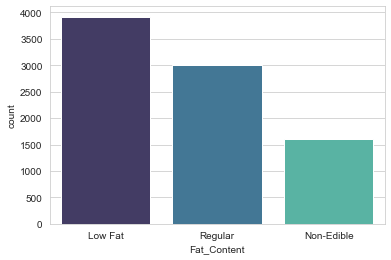

In [37]:
sns.set_style('whitegrid')
sns.countplot(x = 'Item_Fat_Content', data = dt, palette = 'mako',)
plt.xlabel('Fat_Content')

Low Fat Item nears around 3900 counts, regulars are 3000 and Non-edible are 1600

Text(0.5, 0, 'Item_Type')

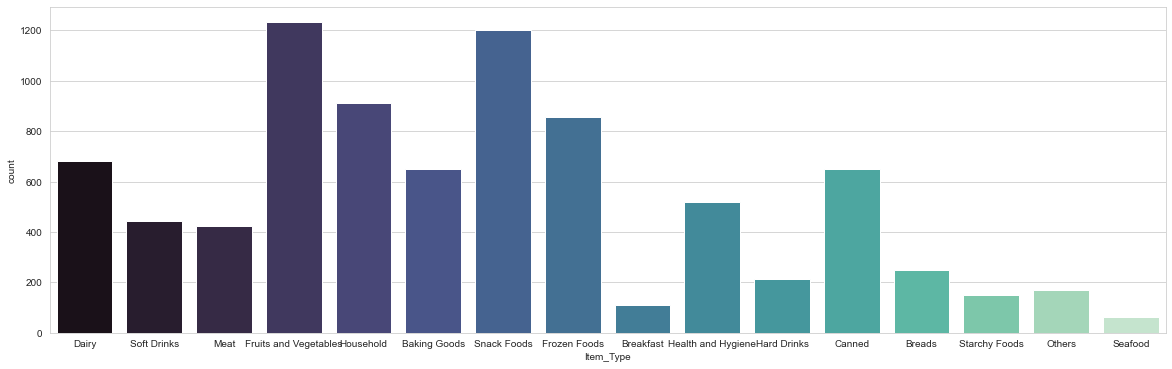

In [38]:
%matplotlib inline
plt.figure(figsize=(20,6))
sns.countplot(x = 'Item_Type', data = dt, palette = 'mako',)
plt.xlabel('Item_Type')

Snacks & Fruits-Veggies are consumed more than others. Next come the Household items,Dairy, Frozen foods, Canned & Baking goods. Seafood is least item sold

Text(0.5, 0, 'Outlet_Size')

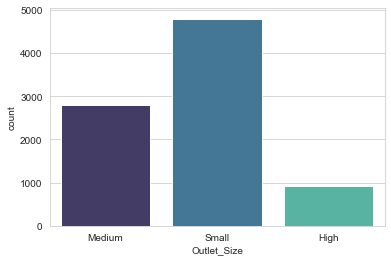

In [39]:
sns.countplot(x = 'Outlet_Size', data = dt, palette = 'mako',)
plt.xlabel('Outlet_Size')

Small sized outlet prevails more and High sized Outlet are comparatively less

Text(0.5, 0, 'Outlet_location_Type')

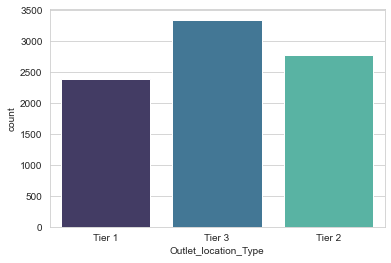

In [40]:
sns.countplot(x = 'Outlet_Location_Type', data = dt, palette = 'mako',)
plt.xlabel('Outlet_location_Type')

Tier 3 location has the highest outlets, Tier 2 location comes next and Tier 1 has least amount of outlet

Text(0.5, 0, 'Outlet_Type')

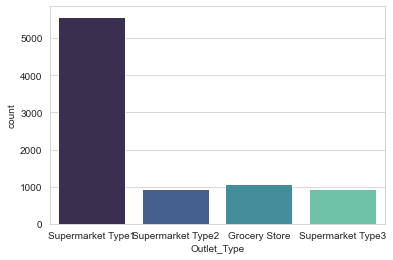

In [41]:
sns.countplot(x = 'Outlet_Type', data = dt, palette = 'mako',)
plt.xlabel('Outlet_Type')

Type 1 supermarket is comparatively built more than other which are near 1000

Text(0.5, 0, 'Established')

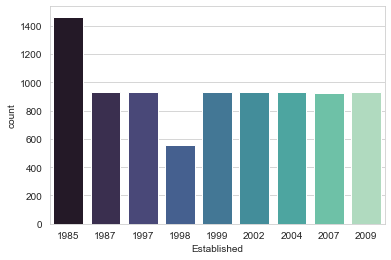

In [42]:
sns.countplot(x = 'Outlet_Establishment_Year', data = dt, palette = 'mako',)
plt.xlabel('Established')

More supermarkets are built in early days (1985). 1999 is the year that saw least amount of supermarkets being built. Rest of them saw on average 900/year

### Bivariate Visuals

In [43]:
dt.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Established'],
      dtype='object')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

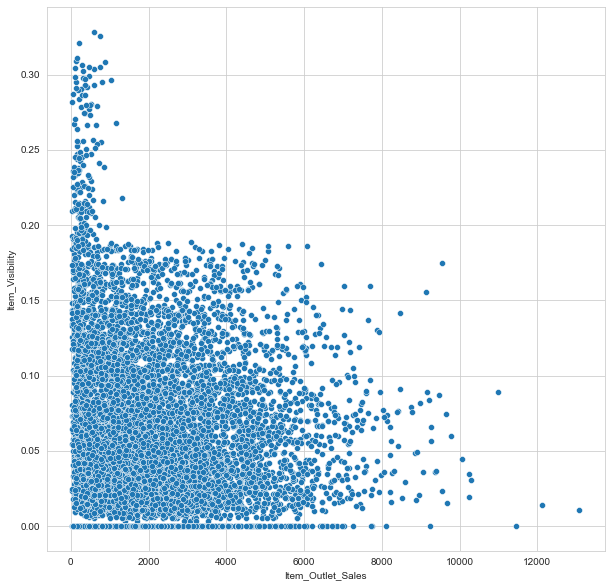

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Item_Outlet_Sales',y='Item_Visibility',data=dt, palette = 'pastel')

More data lies where visibility lies 0<x<17 & 0<sales<6000. Also there are certain items whose visibility is zero which is not ideal in real time

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_MRP'>

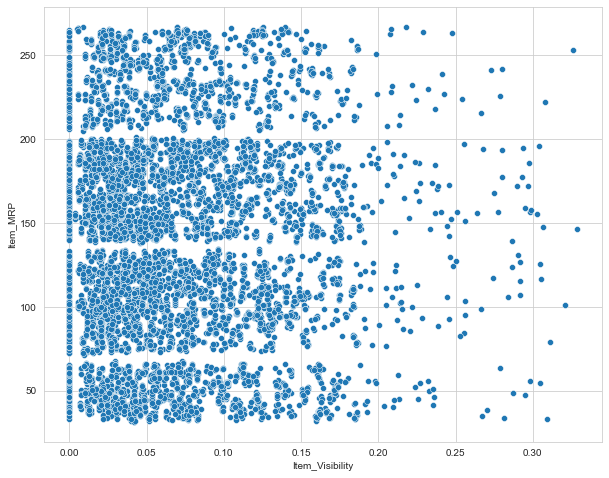

In [45]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Item_Visibility',y='Item_MRP',data=dt, palette = 'coolwarm')

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_MRP'>

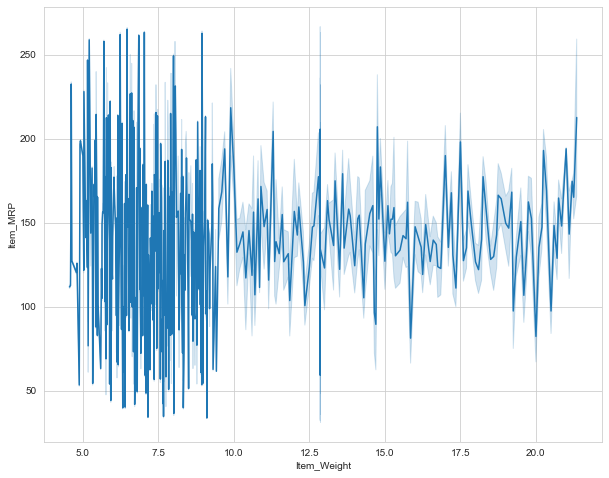

In [46]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Item_Weight',y='Item_MRP',data=dt, palette = 'coolwarm')

Majority of the Item weight ranges from 5unit to 9unit and the maximum going above 20unit whose price is near 150

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_MRP'>

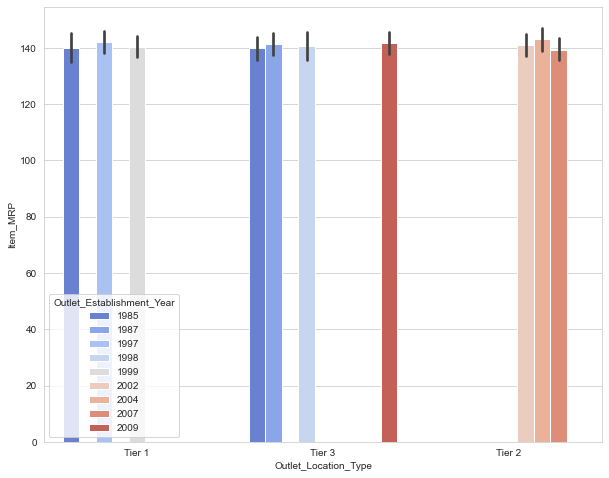

In [47]:
plt.figure(figsize=(10,8))
sns.barplot(x='Outlet_Location_Type',y='Item_MRP',data=dt, palette = 'coolwarm',hue='Outlet_Establishment_Year')

<Figure size 864x864 with 0 Axes>

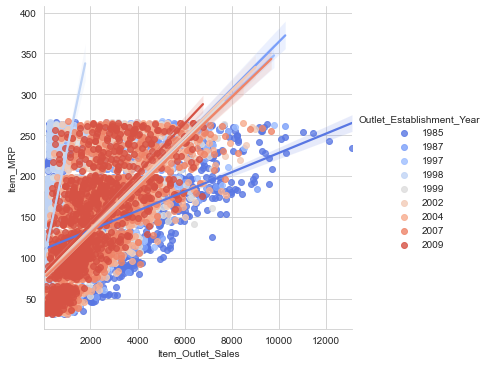

In [48]:
plt.figure(figsize=(12,12))
sns.lmplot(x='Item_Outlet_Sales',y='Item_MRP',data=dt, palette = 'coolwarm',hue='Outlet_Establishment_Year')

The sale has increased when MRP is high. Some outlet sales established in 1980's have higher figure in sales than the ones which are established in recent years

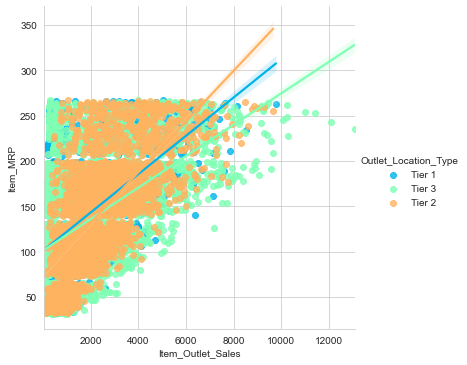

In [49]:
sns.lmplot(x='Item_Outlet_Sales',y='Item_MRP',data=dt, palette = 'rainbow',hue='Outlet_Location_Type')

Tier 3 sales figure are distributed all over the axes

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

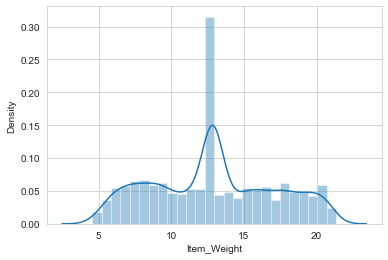

In [50]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(dt['Item_Weight'], )

Seems normal distribution

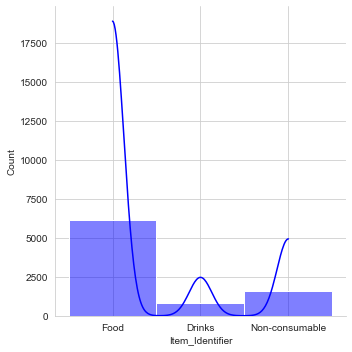

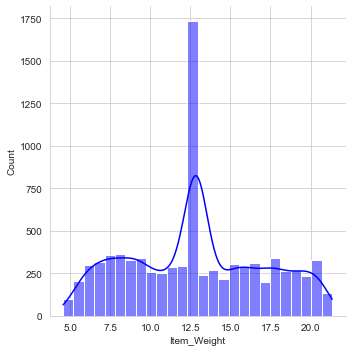

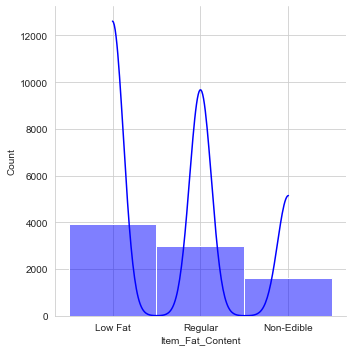

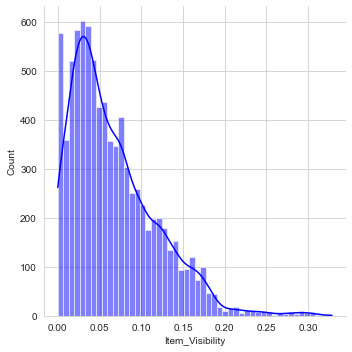

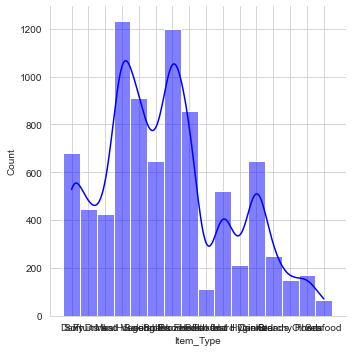

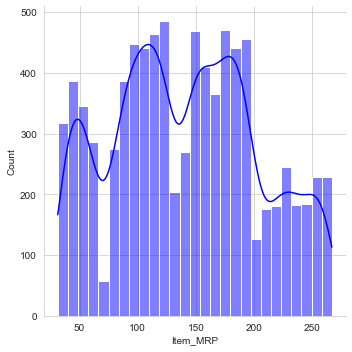

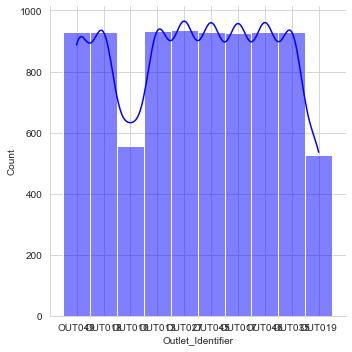

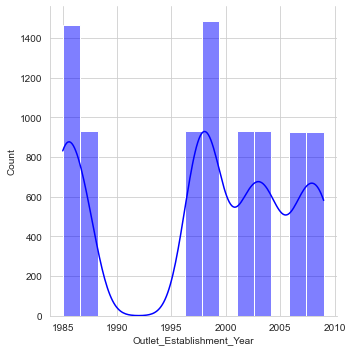

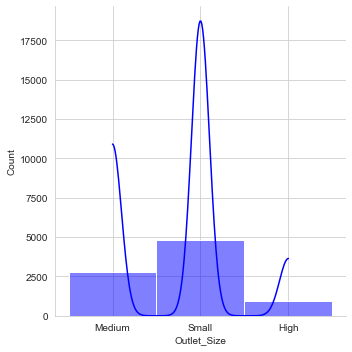

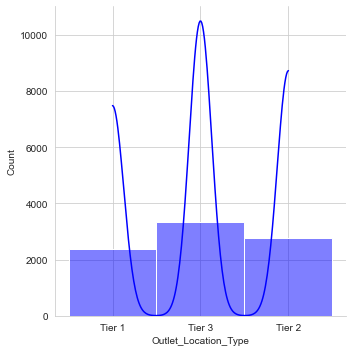

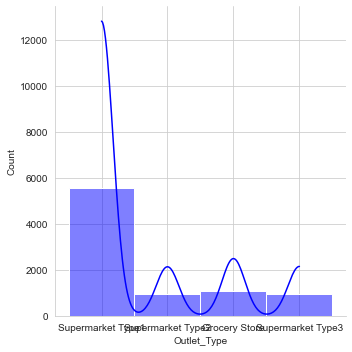

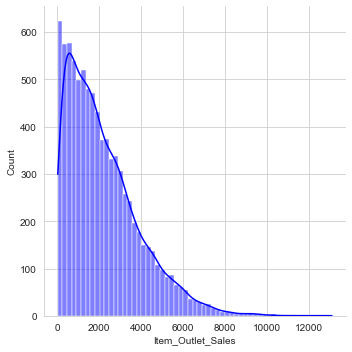

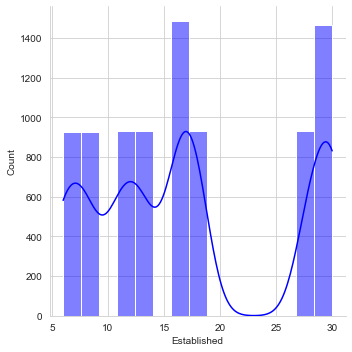

In [51]:
for i in dt.columns:    
    sns.displot(x=i,color = 'blue', data = dt, kde=True)

## Data Preprocessing

In [52]:
dt.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Established                  0.396641
dtype: float64

In [53]:
#Will apply log transformation to Item_Visibility & Outlet_Sales
dt['Item_Visibility'] = np.sqrt(dt['Item_Visibility'])

In [54]:
dt['Item_Outlet_Sales'] = np.sqrt(dt['Item_Outlet_Sales'])

In [55]:
dt.skew()

Item_Weight                  0.090561
Item_Visibility             -0.098056
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            0.234676
Established                  0.396641
dtype: float64

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder()
dt['Item_Identifier'] = le.fit_transform(dt['Item_Identifier'])
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for i in cat_cols:
    dt[i] = le.fit_transform(dt[i])

In [58]:
dt.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Established
0,1,9.30,0,0.126678,4,249.8092,OUT049,1999,1,0,1,61.115775,16
1,0,5.92,2,0.138846,14,48.2692,OUT018,2009,1,2,2,21.057607,6
2,1,17.50,0,0.129461,10,141.6180,OUT049,1999,1,0,1,45.795961,16
3,1,19.20,2,0.000000,6,182.0950,OUT010,1998,2,2,0,27.062520,17
4,2,8.93,1,0.000000,9,53.8614,OUT013,1987,0,2,1,31.538947,28


### Splitting Dataset

In [59]:
x = dt.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
y = dt['Item_Outlet_Sales']

In [60]:
scale = StandardScaler()
X = scale.fit_transform(x)

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Model Training

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [63]:
def CV_score(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    cv_score = cross_val_score(model, X, y, cv=5, scoring = 'r2' )
    cv_score = np.mean(cv_score)
    
    print('Mean absolute error:', MAE(y_test,y_pred))
    print('Root mean squared error:', np.sqrt(MSE(y_test,y_pred)))
    print('R2 Score:', r2_score(y_test,y_pred))
    print('CV Score:', cv_score)

## Parameter Tuning

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
CV_score(lr)

Mean absolute error: 9.498232609860796
Root mean squared error: 12.088626260071152
R2 Score: 0.5585979229582085
CV Score: 0.5533563561353885


### Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr_para = {'C': [0.6,0.7,0.8,0.9,1,1.2,1.3,1.4,1.5],
            'kernel': ['rbf','poly','linear'],
            }
svr_tuning = GridSearchCV(estimator = svr, param_grid = svr_para, cv=5, scoring = 'r2')
svr_tuning.fit(X,y)
print(svr_tuning.best_params_)
print(svr_tuning.best_score_)

In [66]:
svr = SVR(C=1.5, kernel = 'rbf')
CV_score(svr)

Mean absolute error: 8.065993773935684
Root mean squared error: 10.499103579906889
R2 Score: 0.6670454828010788
CV Score: 0.6616925117905387


## Decision Tree Regressor

In [74]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr_para = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
dtr_tuning = GridSearchCV(dtr, dtr_para, cv=5, scoring = 'r2')
dtr_tuning.fit(X,y)
print(dtr_tuning.best_params_)
print(dtr_tuning.best_score_)

{'criterion': 'squared_error'}
0.32587571139343996


In [76]:
dtr = DecisionTreeRegressor(criterion = 'squared_error', splitter = 'best')
CV_score(dtr)

Mean absolute error: 11.246137052723807
Root mean squared error: 14.671289914182992
R2 Score: 0.3498447572911322
CV Score: 0.32332227664305313


## Random Forest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr_para = {'criterion': ['squared_error','poisson','absolute_error'],
           }
rfr_tuning = GridSearchCV( rfr, rfr_para, cv = 5, scoring = 'r2')
rfr_tuning.fit(X,y)
print(rfr_tuning.best_params_)
print(rfr_tuning.best_score_)

{'criterion': 'absolute_error'}
0.6366740019915114


In [78]:
rfr = RandomForestRegressor(criterion = 'absolute_error')
CV_score(rfr)

Mean absolute error: 8.332336495733044
Root mean squared error: 10.935210342406055
R2 Score: 0.6388108022253443
CV Score: 0.6360998303063015


## Extra Tree Regressor

In [79]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr_para = {'criterion': ['squared_error','absolute_error'],
            'max_features': ['auto','sqrt','log2']
           }
etr_tuning = GridSearchCV(etr, etr_para, cv=5, scoring ='r2')
etr_tuning.fit(X,y)
print(etr_tuning.best_params_)
print(etr_tuning.best_score_)

{'criterion': 'absolute_error', 'max_features': 'sqrt'}
0.6313163185194922


In [81]:
etr = ExtraTreesRegressor(criterion = 'absolute_error', max_features = 'sqrt')
CV_score(etr)

Mean absolute error: 8.350205035998178
Root mean squared error: 10.859514528523883
R2 Score: 0.643793949521396
CV Score: 0.631266569248388


## SGD Regressor

In [83]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd_para = {'alpha': [1,1.5,2,2,5,3],
            'penalty':['l2','l1'],
           }
sgd_tuning = GridSearchCV(estimator = sgd, param_grid = sgd_para, cv = 5, scoring = 'r2')
sgd_tuning.fit(X,y)
print(sgd_tuning.best_params_)
print(sgd_tuning.best_score_)

{'alpha': 1, 'penalty': 'l1'}
0.5257704205505205


In [84]:
sgd = SGDRegressor(alpha = 1, penalty = 'l1')
CV_score(sgd)

Mean absolute error: 10.026175462649304
Root mean squared error: 12.524381736289472
R2 Score: 0.5262021745729037
CV Score: 0.5266440939059842


## XGBoost Regressor

In [86]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', metric='minkowski')
CV_score(knr)

Mean absolute error: 8.755100331431445
Root mean squared error: 11.402901117503845
R2 Score: 0.6072545275144897
CV Score: 0.5941956878203732


### Extra Trees Regressor seems to have upper edge over the other model.

## Savin the best model

In [88]:
import pickle
save_file = 'ETR_Practiceproject_7.pkl'
pickle.dump(etr, open(save_file,'wb'))